# Emerging Technology Project -
## **The Deutsch–Jozsa algorithm** 

#### To first understand "The Deutsch–Jozsa algorithm", we have to first learn about the basics of Quantum Computing

*** 

The point of this Journal is to

- Explore Deutsch-jozha algorithm
- how to solve the problem
- build quantum circuits using Qiskit to implement the algorithm, inlcude oracle circuits to demonstrate

**Index Page**

>[Introduction- Quantum Computing](#What-is-Quantum-Computing)

>[Bits and Qubits ](#Bits-and-Qubits )

>[Deutsch's Algorithm](#Deutsch's-Algorithm)

>[Circuit Design](#Circuit-Design)

>[Conclusion](#Conclusion)

>[References](#References)


***

# What is Quantum Computing 

#### To know more about what Quantum computing is, you need first an explanation of Classical computing and then quantum computing.

### Classical Computing 
A classical computer, Like the one you are using right now, we use bits (short for "binary digit") as the basic unit of information. These are the smallest unit of data in computing, We represent these bits by either a 0 or a 1 (These are also called states). These are used for the operations performed to do complex calculations and programs by manipulating sequences of bits (often by being turned into Bytes, 8 Bits in a sequence to create a character). It's the foundation of most of the computing technology we use daily.<a href="https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information/single-systems#quantum-information">[1]<a></a>




### Quantum Computing
Quantum computers share many of the same qualities of classical computers, circuits, logic gates..etc. However they use quantum bits (Quibits for short), These can represent 0, 1, or any combination of both simultaneously due to a property called "superposition".  This superposition basically means it can be in between the 0 and 1 until its actually measured. 
So what can this Quibit be used for in terms of quantum computing? Quibits play an essential role to simulate molecular-level quantum mechanics, such as Quantum entanglement. This is multiple states of quibits together, which means they are linked (entangled) together, giving access to unknown corners of classical computing. <a href="https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information/single-systems#quantum-information">[1]<a><a href="https://scienceexchange.caltech.edu/topics/quantum-science-explained/quantum-computing-computers">[3]<a></a>

![Alt text](https://tse2.mm.bing.net/th?id=OIP.Thcb5IotJuKKpmQhWs_yIwHaH_&pid=Api&P=0&h=400)

## 

***

# Bits and Qubits 

### To look more at these Bits and Qubits mentioned before...

*Bits* are building blocks to all the data and operations in processes in classical computers comprised of 0 or 1. This, as previously said, can can be grouped and turned into larger characters and numbers as Bytes (Groups of 8 bits). In more modern day computing, these bits are shown by the the lack or presence of an electrical signal, giving the 0(lack of singal) or 1(presence of signal). 

A *quibit* (Quantum bit) can also be comprised of 0 or 1, but unlike classical bits, it can exist in a state of quantum superposition of both 0 and 1.. In short terms, this means the a quibit is a state of both 0 and 1 until it is finally measured. 
<a href="https://learn.microsoft.com/en-us/azure/quantum/concepts-the-qubitv">[5]<a><a href="https://uwaterloo.ca/institute-for-quantum-computing/quantum-101/quantum-information-science-and-technology/what-qubit">[4]<a></a><a href="https://o7planning.org/11573/history-of-bits-and-bytes-in-computer-science">[10]</a>


![Alt text](https://tse2.mm.bing.net/th?id=OIP.5X8r5b6EEg1Ca8l-mR1-wgHaEE&pid=Api&P=0&h=180)


### In mathematical terms,
#### Bits 
The bit can be of two states, "ON" or "OFF". A constant 50/50 flip of a coin. 
**The states are mutually exclusive.**
$$ (0, 1) $$

#### Quibits
While the Quibit can be expressed as vector spaces. Unlike classical bits, qubits can exist in a superposition of the states, which is expressed as a linear combination of the basis states |0⟩ and |1⟩.

Mathematically, this superposition is denoted as α|0⟩ + β|1⟩, where α and β are complex numbers. The probabilities of measuring 0 or 1 are given by the squared magnitudes of α and β. <a href="https://medium.com/the-research-nest/understanding-the-theory-and-math-behind-qubits-2bf86a56441c">[6]<a></a><a href="https://o7planning.org/11573/history-of-bits-and-bytes-in-computer-science">[10]</a>

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

### How do we measure Quibits?

So as said prevouisly said, a quibit is in a superposition of the states until it is actually measured. The act of measuring the quibit makes the superpostion collapse on itself, returning to the basic states. The outcome is a probability, with the probabilities determined by the square magnitudes of the amplitudes α and β.]

$$
|\alpha|^2 + |\beta|^2 = 1
$$



## 

***

# Deutsch's Algorithm

Deutsch's Algorithm, developed by David Deutsch in the 1980s, was one of the first quantum algorithms. It demonstrated that quantum computers could out do the Classical computers in specific tasks. This task was deigned to solve a problem known as the Deutsh's problem.<a href="https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm">[13]</a>

### Deutsh's problem

This involves a "Black box" function (also known as an oracle), this "black box" takes in a single bit as an input, and it's output is returned as a single bit. The defining factor of this is whether the function is  *constant* or *balanced*.  <a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+8.370.2x+1T2018/courseware/Week2/lectures_U2_2_dj_qcirc/?activate_block_id=block-v1%3AMITx%2B8.370.2x%2B1T2018%2Btype%40sequential%2Bblock%40lectures_U2_2_dj_qcirc">[11]</a>


- **Constant**: The function always returns 0

- **Balanced**: The function can return anything but just 0

The goal is to determine this with as little evaluations (Queries) as possible. 

### What Deutsch's Algorithm aims to solve

The goal of Deutsch's Algorithm is to exploit quantum mechanics, to use Superpostion and to determine whether the function is balanced or constant, through only one evaluation. This is done by using a Quibit, which unlike the orignals, is a superpostion of both the 0 and 1 states. <a href="LaPierre, R. (2021). Deutsch Algorithm. In: Introduction to Quantum Computing . The Materials Research Society Series. Springer, Cham. https://doi.org/10.1007/978-3-030-69318-3_11">[12]</a><a href="https://people.vcu.edu/~sgharibian/courses/CMSC491/notes/Lecture%206%20-%20Deutsch%27s%20algorithm.pdf
">[9]</a>



## 

***

# Circuit Design

![Alt text](https://learning-api.quantum.ibm.com/assets/7c475a03-3cb6-431a-a744-5d8d4a53148c?format=auto&quality=80)

**The image above is an example of a Quantum circuit that describes the Deutches algorithm**.<a href="https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm">[13]</a>

 - The Circuit starts with the two Quibits ∣0⟩ and ∣1⟩ (Input and Output Quibits)
 - They are then put through **Hadamard Gates** (The boxes with H)
 - Next the ciruit goes through the Oracle, this is the Box labelled Uf. The oracle is function, which depends on whether its constant or balanced. It will apply a specific effect in which, constant will do nothing, but balanced will flip the second Quibit if the first Quibit is ∣1⟩.
 - Another hadamard gate is applied to the first quibit, this is known as **interference**
 - The final step of the circuit is to measure the first Quibit. If the function is constant, it will always return 0. While if the function is balanced it will return 1. <a href="https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm">[13]</a>

#### Hadarmard Gates
The Hadamard gate, Shown as H, is a *Quantum gate* that operates on a single qubit. Quantum Gates can change the superposition adn entanglemnts of Quibits, allowing quantum computers to process information in parallel across multiple probabilities. Quantum gates are usually unitary matrices, meaning they are reversible and keep the overall probability.

The primary role of the Hadarmard gate is to create a superposition state from a definite state. When a Hadamard gate is applied to a qubit in a known state (either ∣0⟩∣0⟩ or ∣1⟩∣1⟩), it transforms that qubit into a state of equal superposition of both ∣0⟩∣0⟩ and ∣1⟩∣1⟩, assuming ideal conditions.

The equation behind the hadarmard Gates is as follows:

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
$$


#### Interference 
What this interference does is if the function is constant, the result of the interference is more likely to equal 1 for the |0⟩ state (constructive interference) and the result of 0 for the |1⟩ state (destructive interference). If the function is balanced, the interference pattern is reversed, leading to a result of |1⟩.




#### This is an Example of a Hadamard in a circuit

In [28]:
from qiskit import QuantumCircuit
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)
# Apply the Hadamard gate to the qubit
qc.h(0)
# Draw the circuit
hadamard_circuit = qc.draw(output='text')
print(hadamard_circuit)

   ┌───┐
q: ┤ H ├
   └───┘


***

## Example work of the circuits 

In implementing Deutsch's Algorithm, quantum circuits play a crucial role. These circuits use quantum gates to manipulate qubits, similar to how classical circuits use logic gates to manipulate bits. To show Deutsch's Algorithm, typically We design a quantum circuit that includes:

 - A series of Hadamard gates to create superpositions of qubit states.
 - An 'oracle' function, a black-box operation that encodes the function being investigated.
 - Further quantum gates to exploit interference, enabling the algorithm to discern the nature of the function.

 #### Here I will build a quantum Circuit using Qisket to demonstrate the Deutsch's algorithm like the ciruit above: <a href="https://qiskit.org/">[7]</a><a href="https://towardsdatascience.com/behind-oracles-grovers-algorithm-amplitude-amplification-46b928b46f1e">[6]</a> <a href="https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/#:~:text=The%20Deutsch%20algorithm%20is%20a%20quantum%20algorithm%20capable,query%20to%20a%20quantum%20oracle%20for%20%20%28f%29.">[8]<a></a><a href="https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm">[13]</a>

#### Imports

In [23]:
from qiskit import Aer, transpile, assemble, execute, QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector


### Circuit Build - Balanced 

In [24]:

def deutsch_algorithm(oracle_type):
    # Create quantum circuit with 2 bits
    q0 = QuantumRegister(1, 'q0')
    q1 = QuantumRegister(1, 'q1')
    c = ClassicalRegister(1, 'c')

    qc = QuantumCircuit(q0, q1, c)

    # Apply the X gate to flip the second qubit to a state of |1⟩
    qc.x(q1[0])  

    # Apply the Hadamard gate to both qubits
    qc.h(q0[0]) 
    qc.h(q1[0])

    # Apply the oracle
    if oracle_type == 'balanced':
        # Apply CNOT gate for a balanced oracle
        qc.cx(q0[0], q1[0])
    elif oracle_type == 'constant':
        # Do nothing for a constant oracle that always outputs 0
        pass

    # Apply Hadamard again to the first qubit
    qc.h(q0[0])

    # Measure the first qubit into the classical register
    qc.measure(q0, c)

    return qc


In [25]:
# Choose the oracle type ('constant' or 'balanced')
oracle_type = 'balanced'

# Build the circuit
circuit = deutsch_algorithm(oracle_type)

# Visualize the circuit
print("Quantum Circuit:")
print(circuit)

# Choose the simulator backend
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit and get the statevector
result = execute(circuit, backend).result()
statevector = result.get_statevector()

# Print the final statevector
print("\nFinal Statevector:")
print(statevector)


Quantum Circuit:
     ┌───┐          ┌───┐┌─┐
 q0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
 q1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 

Final Statevector:
Statevector([ 0.        +0.00000000e+00j,  0.70710678-1.29893408e-16j,
              0.        +0.00000000e+00j, -0.70710678+1.29893408e-16j],
            dims=(2, 2))


### Results:
The circuit shows the process of the code and it's application

The statevector has much results, it shows the values near zero (With very small imaginary parts) which indicates they have basically no probabilty of being measured.
The 0.70710678 ( $\frac{1}{\sqrt{2}}$) suggests if we measured the the system, the first Quibit is |1⟩
Since the first Quibit is |1⟩, it indicates that the Oracle function is Balanced, Proving the algorithm correct.


We can also plot the Quibits and visualize them as Bloch spheres. This is another way to see the effects of quantum gates on the qubits.

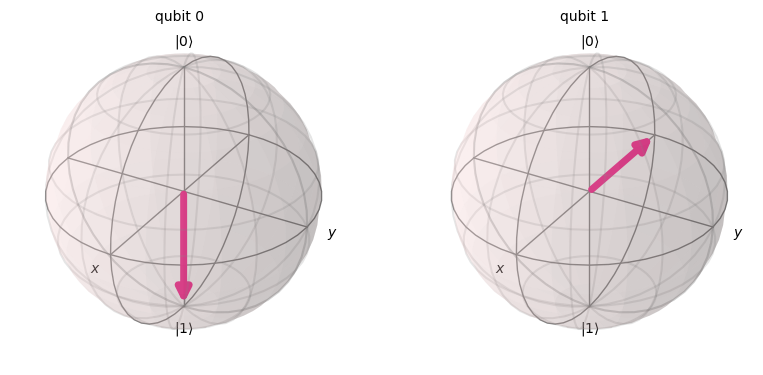

In [14]:
# Plotting the Bloch sphere for qubits
plot_bloch_multivector(statevector)

### Circuit Build - Constant

Quantum Circuit:
     ┌───┐┌───┐┌─┐
 q0: ┤ H ├┤ H ├┤M├
     ├───┤├───┤└╥┘
 q1: ┤ X ├┤ H ├─╫─
     └───┘└───┘ ║ 
c: 1/═══════════╩═
                0 

Final Statevector:
Statevector([ 0.70710678-1.29893408e-16j,  0.        +0.00000000e+00j,
             -0.70710678+1.29893408e-16j,  0.        -0.00000000e+00j],
            dims=(2, 2))


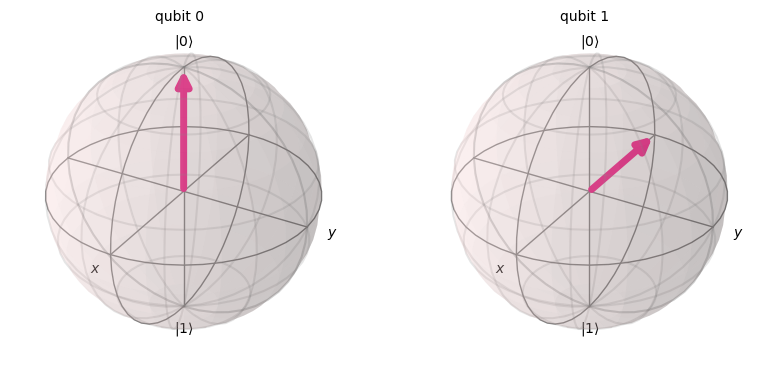

In [27]:
# Choose the oracle type ('constant' or 'balanced')
oracle_type = 'constant'

# Build the circuit
circuit = deutsch_algorithm(oracle_type)

# Visualize the circuit
print("Quantum Circuit:")
print(circuit)

# Choose the simulator backend
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit and get the statevector
result = execute(circuit, backend).result()
statevector = result.get_statevector()

# Print the final statevector
print("\nFinal Statevector:")
print(statevector)

# Plotting the Bloch sphere for qubits
plot_bloch_multivector(statevector)


### Results:
As we can see from the results of the constant function, the Statevector indicate the first Quibit is in the states ∣0⟩ or ∣1⟩, they're both non-zero. However, after applying the second set of Hadamard gates, the result of the First quibit will be ∣0⟩, which means the function is constant. 

This is because the Hadamard transforms will interfere constructively for the ∣0⟩ state and destructively for the ∣1⟩ state due to the nature of the constant function.

*** 
# Conclusion


In conclusion, the Deutsch–Jozsa algorithm shows the power of quantum computers to solve certain problems much faster than traditional computers. It uses quantum superposition, where a quantum bit can be in multiple states at once, to figure out if a function is constant or balanced with just one evaluation, rather than classical computers needing two. This opens the door to more advanced quantum algorithms that could change tough problems of modern computers. By using Qisket, we can get a glimpse of how powerful these machines may be.

***

# references

<a>[1]</a> https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information/single-systems#quantum-information

<a>[2]</a> https://devtechnosys.com/insights/tech-comparison/quantum-computing-vs-classical-computing/#:~:text=The%20classical%20bit%20is%20the%20basic%20unit%20in,of%20a%20given%20input%20is%20always%20the%20same.

<a>[3]</a> https://scienceexchange.caltech.edu/topics/quantum-science-explained/quantum-computing-computers

<a>[4]</a> https://uwaterloo.ca/institute-for-quantum-computing/quantum-101/quantum-information-science-and-technology/what-qubit

<a>[5]</a> https://learn.microsoft.com/en-us/azure/quantum/concepts-the-qubitv

<a>[6]</a>https://medium.com/the-research-nest/understanding-the-theory-and-math-behind-qubits-2bf86a56441c

<a>[7]</a>https://qiskit.org/

<a>[8]</a>https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/#:~:text=The%20Deutsch%20algorithm%20is%20a%20quantum%20algorithm%20capable,query%20to%20a%20quantum%20oracle%20for%20%20%28f%29.

<a>[9]</a>https://people.vcu.edu/~sgharibian/courses/CMSC491/notes/Lecture%206%20-%20Deutsch%27s%20algorithm.pdf

<a>[10]</a>https://o7planning.org/11573/history-of-bits-and-bytes-in-computer-science

<a>[11]</a>https://openlearninglibrary.mit.edu/courses/course-v1:MITx+8.370.2x+1T2018/courseware/Week2/lectures_U2_2_dj_qcirc/?activate_block_id=block-v1%3AMITx%2B8.370.2x%2B1T2018%2Btype%40sequential%2Bblock%40lectures_U2_2_dj_qcirc

<a>[12]</a>LaPierre, R. (2021). Deutsch Algorithm. In: Introduction to Quantum Computing . The Materials Research Society Series. Springer, Cham. https://doi.org/10.1007/978-3-030-69318-3_11

<a>[13]</a>https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm

**Links**

*** 

# End of project 